# Linear Regression

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self,X,y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_pred = np.dot(X,self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self,X):
        y_pred = np.dot(X,self.weights) + self.bias
        return y_pred

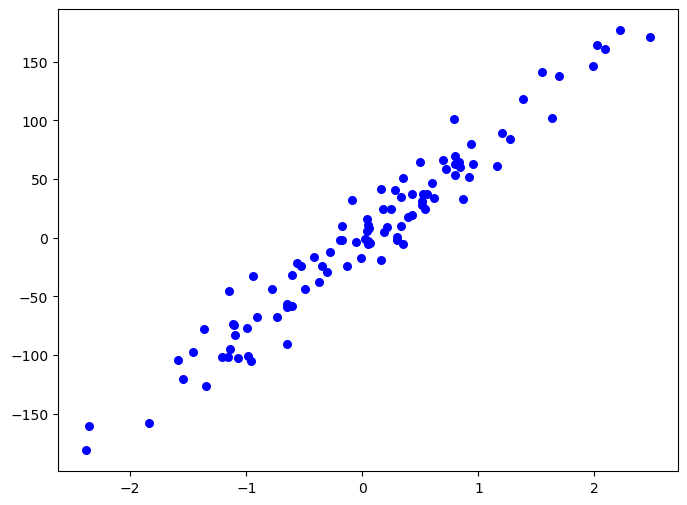

In [4]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = "b", marker = "o", s = 30)
plt.show()

In [5]:
reg = LinearRegression(lr=0.001)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [7]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)


mse = mse(y_test, y_pred)
print(mse)

783.815546512549


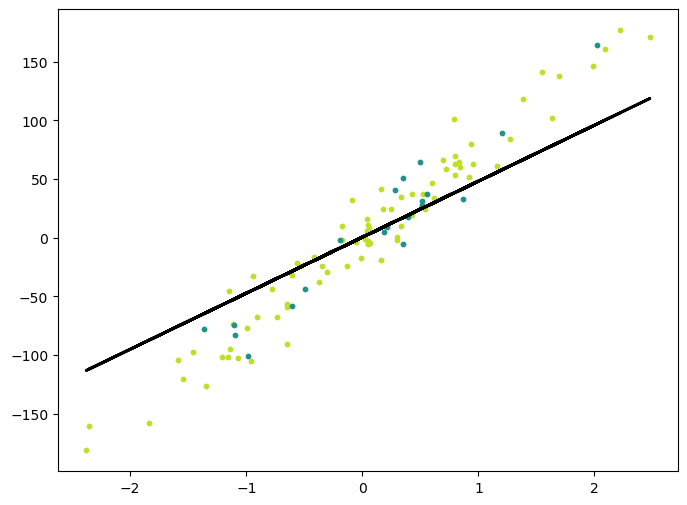

In [8]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()

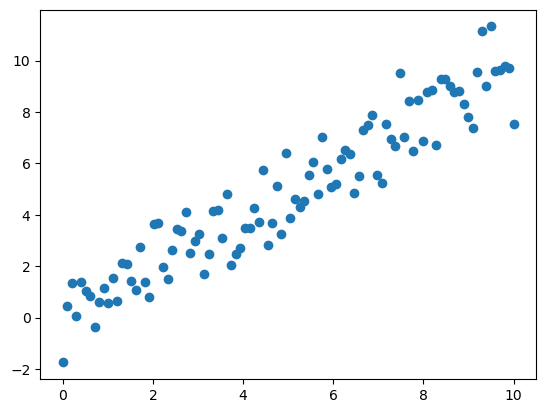

In [4]:
np.random.seed(100) #permet de fixer une graine (seed) spécifique
m = 100
X = np.linspace(0,10,m).reshape(m,1) # séquence de 100 nombres régulièrement espacés entre 0 et 10, inclus.
y = X + np.random.randn(m,1)
plt.scatter(X,y)

In [6]:
model = LinearRegression()
model.fit(X,y)
print("Le coefficient de détermination R^2 vaut :" ,model.score(X,y)) 

Le coefficient de détermination R^2 vaut : 0.8965082383567187


Text(0.5, 1.0, 'Régression Linéaire')

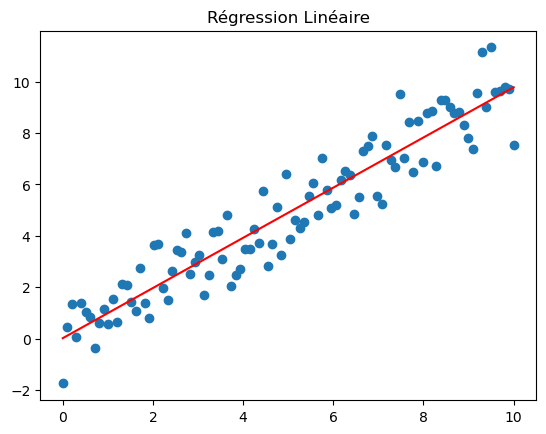

In [7]:
plt.scatter(X,y)
plt.plot(X,model.predict(X), c='r')
plt.title('Régression Linéaire')

## Parfois on ne peut pas vraiment effectuer une régression linéaire ...

Text(0.5, 1.0, 'SVR')

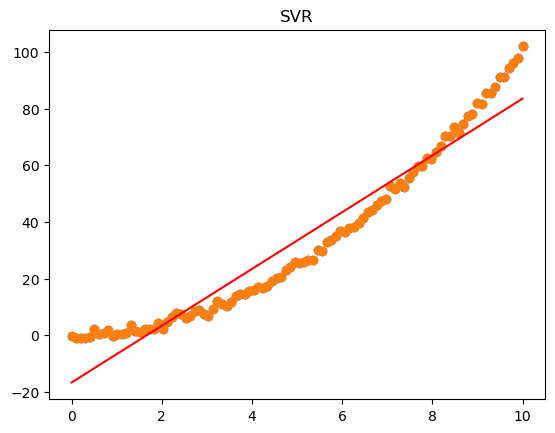

In [15]:
z = X**2 + np.random.randn(m,1)
plt.scatter(X,z)
model = LinearRegression()
model.fit(X,z)
plt.scatter(X,z)
plt.plot(X,model.predict(X), c='r')
plt.title('Régression Linéaire')

/Users/augustincablant/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'SVR')

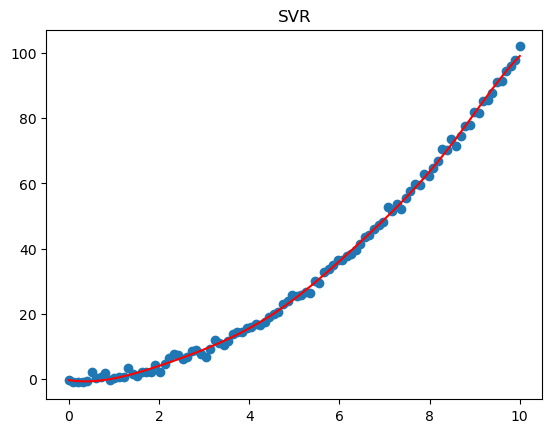

In [20]:
model = SVR(C=100)
model.fit(X,z)
plt.scatter(X,z)
plt.plot(X,model.predict(X), c='r')
plt.title('SVR')

## Linear regression with SKLEARN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, y_train = load_house_data()
X_features = ['size(sqft)','bedrooms','floors','age']


#Scale/normalize the data 
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)

# Create and fit the model 
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)

# View parameters 
b_norm = sgdr.intercept_
w_norm = sgdr.coef_

# Make prediction 
y_pred_sgd = sgdr.predict(X_norm)
#or 
y_pred = np.dot(X_norm, w_norm) + b_norm  